
Training model to predict: Số lượt vận chuyển hành khách

Linear Regression Evaluation:
MAE: 1853000194.012765, MSE: 1.849712100563199e+19, RMSE: 4300827944.202371, R²: -1385.1853757184622


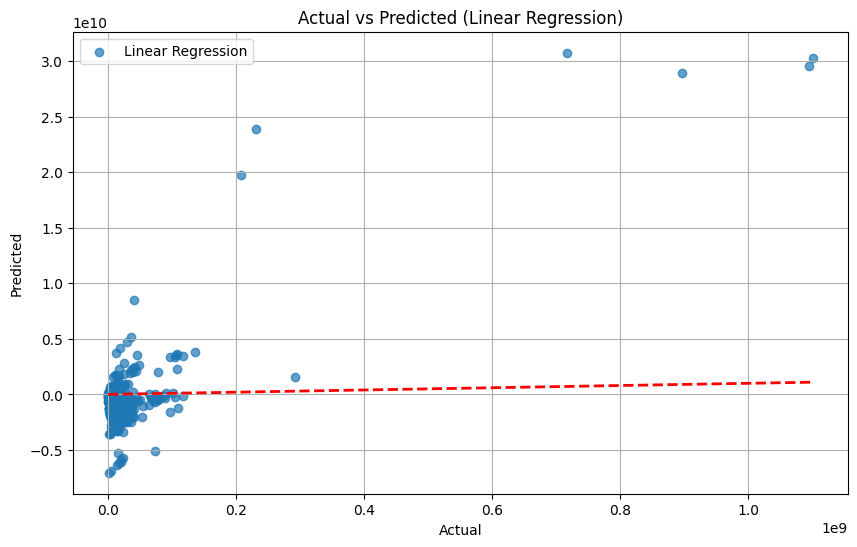


K-Nearest Neighbors Evaluation:
MAE: 7339097.217361111, MSE: 798536242347361.1, RMSE: 28258383.57633644, R²: 0.9401572136125372


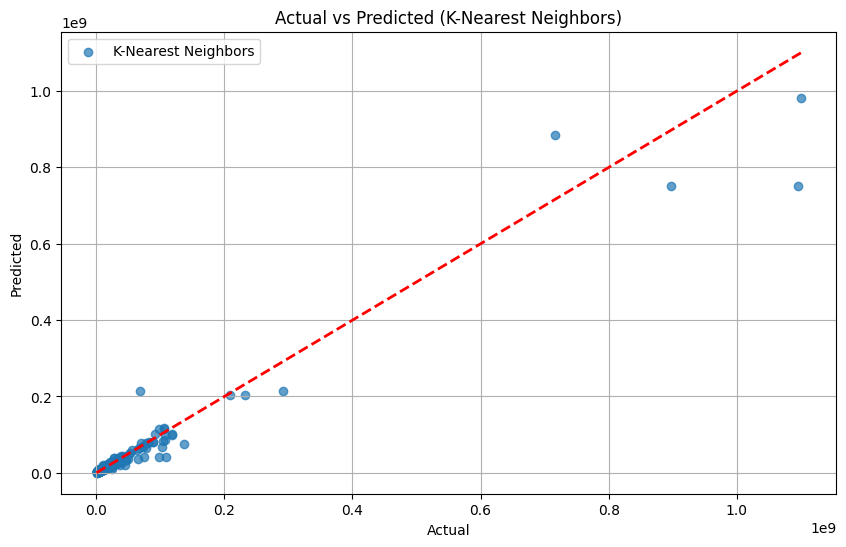


Decision Tree Evaluation:
MAE: 13667071.753182871, MSE: 2553309132129147.5, RMSE: 50530279.35930245, R²: 0.80865347761048


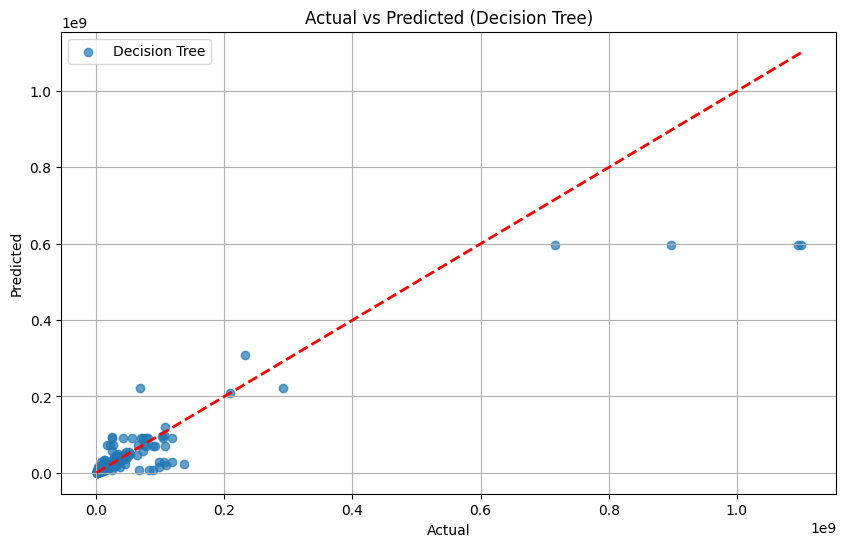


Random Forest Evaluation:
MAE: 8661076.60837441, MSE: 617769597409998.9, RMSE: 24854971.28161686, R²: 0.9537039747303117


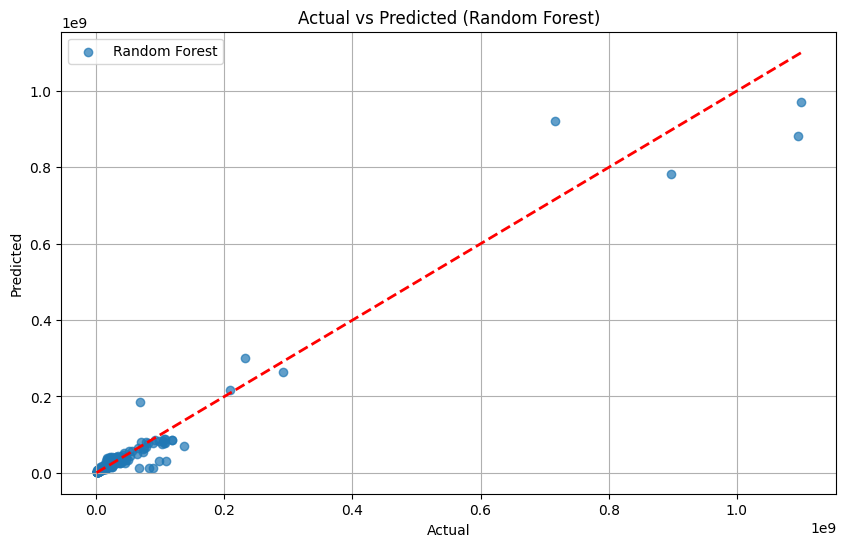


Training model to predict: Số lượt luân chuyển hành khách

Linear Regression Evaluation:
MAE: 5698227732.101362, MSE: 1.8926510984456372e+20, RMSE: 13757365657.8781, R²: -60.52859683752581


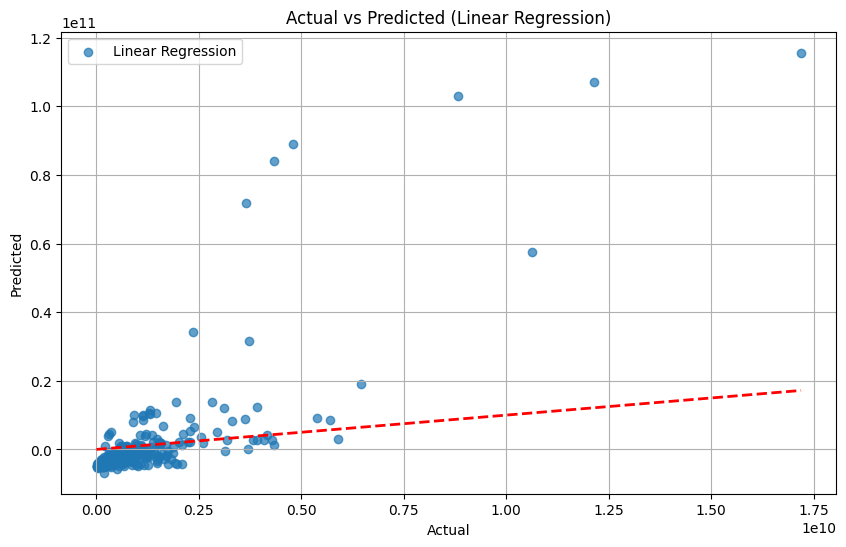


K-Nearest Neighbors Evaluation:
MAE: 258857708.32847226, MSE: 2.7739629555794374e+17, RMSE: 526684246.5443064, R²: 0.9098206486783273


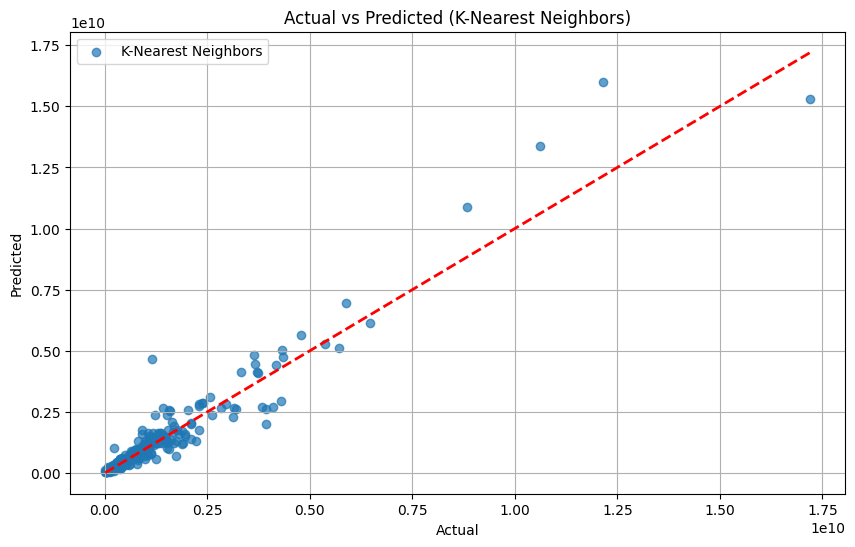


Decision Tree Evaluation:
MAE: 412180092.5842014, MSE: 7.559112395797375e+17, RMSE: 869431561.1822114, R²: 0.7542592084549916


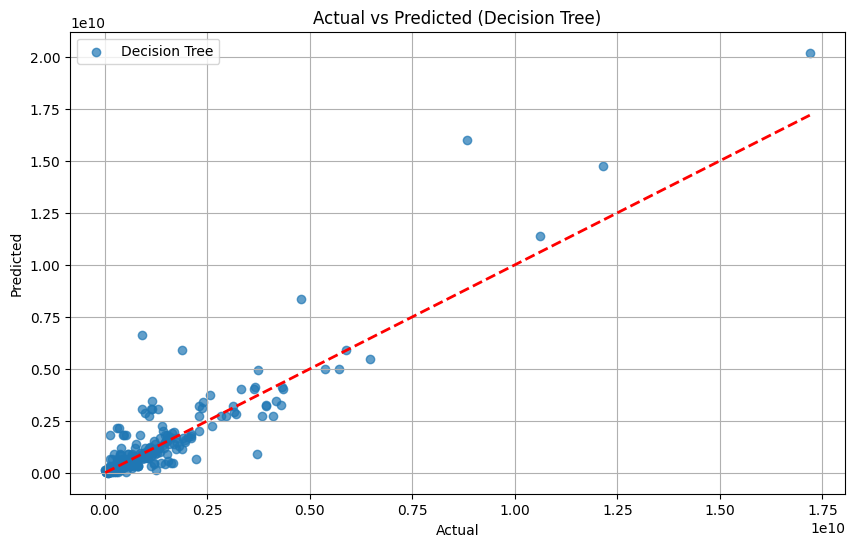


Random Forest Evaluation:
MAE: 337619082.098562, MSE: 5.637362737559454e+17, RMSE: 750823730.1497239, R²: 0.8167337765576294


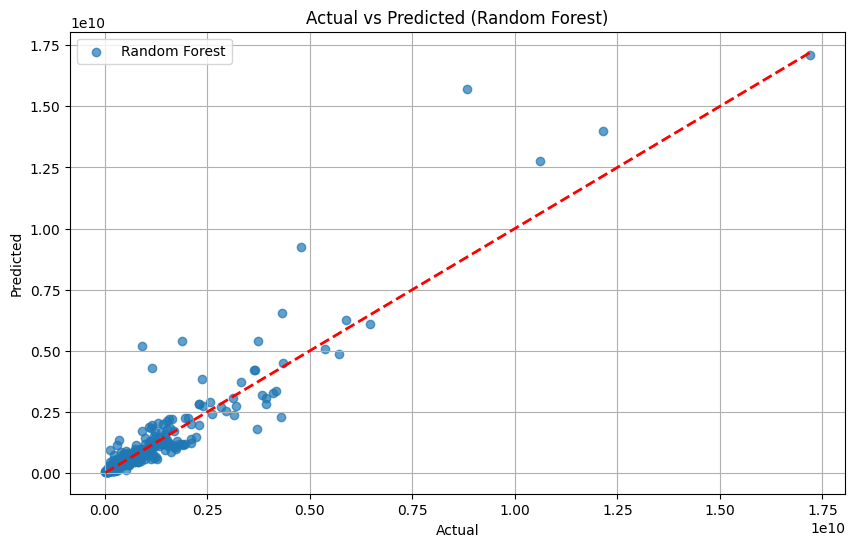

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# Đọc dữ liệu
file_path = "dataset/Data_final.xlsx"
data = pd.read_excel(file_path)

# Mã hóa dữ liệu dạng chuỗi
def encode_data(data):
    label_encoders = {}
    for column in data.select_dtypes(include=['object']).columns:
        le = LabelEncoder()
        data[column] = le.fit_transform(data[column])
        label_encoders[column] = le
    return data, label_encoders

# Chuẩn hóa dữ liệu
def scale_data(data):
    scaler = StandardScaler()
    return pd.DataFrame(scaler.fit_transform(data), columns=data.columns)

# Hàm đánh giá mô hình và vẽ biểu đồ
def evaluate_and_plot(model, X_train, X_test, y_train, y_test, model_name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    print(f"\n{model_name} Evaluation:")
    print(f"MAE: {mae}, MSE: {mse}, RMSE: {rmse}, R²: {r2}")

    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_pred, alpha=0.7, label=model_name)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', linewidth=2)
    plt.title(f"Actual vs Predicted ({model_name})")
    plt.xlabel("Actual")
    plt.ylabel("Predicted")
    plt.legend()
    plt.grid(True)
    plt.show()

# Chuẩn bị dữ liệu
data, label_encoders = encode_data(data)

# Chọn các đặc trưng và mục tiêu
features = [
    "Dân số", "Dân số thành thị", "Dân số nông thôn",
    "Số bệnh viện", "Khối lượng hàng hóa vận chuyển", "Khối lượng hàng hóa luân chuyển",
    "Diện tích nuôi trồng thủy sản", "Số trường tiểu học", "Số trường thcs", "Số trường thpt",
    "Số giáo viên tiểu học", "Số giáo viên thcs", "Số giáo viên thpt"
]

targets = ["Số lượt vận chuyển hành khách", "Số lượt luân chuyển hành khách"]

for target in targets:
    print(f"\nTraining model to predict: {target}")
    X = data[features]
    y = data[target]

    # Chia dữ liệu thành train và test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=None, shuffle=True)

    # Chuẩn hóa dữ liệu
    X_train = scale_data(X_train)
    X_test = scale_data(X_test)

    # Mô hình và đánh giá
    models = {
        "Linear Regression": LinearRegression(),
        "K-Nearest Neighbors": KNeighborsRegressor(n_neighbors=5, weights="uniform", p=2),
        "Decision Tree": DecisionTreeRegressor(random_state=42, max_depth=20, min_samples_split=5, min_samples_leaf=2),
        "Random Forest": RandomForestRegressor(random_state=42, n_estimators=100, max_depth=20, min_samples_split=5, min_samples_leaf=2)
    }

    # Đánh giá và vẽ biểu đồ cho các mô hình
    for model_name, model in models.items():
        evaluate_and_plot(model, X_train, X_test, y_train, y_test, model_name)
